In [1]:
import re
import subprocess
import os
import time  # Import the time module

def extract_project_name_from_yaml(file_path):
    with open(file_path, 'r') as file:
        yaml_content = file.read()
        project_name_start = yaml_content.find('project_name:') + len('project_name:')
        project_name_end = yaml_content.find('\n', project_name_start)
        project_name_value = yaml_content[project_name_start:project_name_end].strip()

    return project_name_value

def filter_runs_with_code_1(file_path):
    """
    Extracts names of runs that ended up with code 1 without a counterpart that ended with code 0.
    
    :param file_path: Path to the text file containing the log data.
    :return: A list of unique run names that meet the criteria.
    """
    # Read the contents of the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Pattern to find runs and exit codes
    pattern = re.compile(r"The command at ([\w\-\.]+) exited with code: (\d)")

    # Find all matches
    matches = pattern.findall(content)

    # Filter runs with code 1 and exclude if there's a same name with code 0
    runs_with_code_1 = set(run for run, code in matches if code == "1")
    runs_with_code_0 = set(run for run, code in matches if code == "0")
    final_runs = runs_with_code_1 - runs_with_code_0
    return list(final_runs)

unsuc_runs_opt_on = filter_runs_with_code_1(r'C:\Stuff\Dataset-creation\renders_output_ngp_stump_opt_on.txt')
unsuc_runs_opt_off = filter_runs_with_code_1(r'C:\Stuff\Dataset-creation\renders_output_ngp_stump_opt_off.txt')



In [2]:
MODEL_TYPE = 'instant-ngp'
PATH_OUTPUTS = r'C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stump_opt_off_navernoe'
i = 0
for degradation_type in os.listdir(PATH_OUTPUTS)[:]:
    runs = os.path.join(PATH_OUTPUTS, degradation_type, MODEL_TYPE)
    for run in os.listdir(runs)[:]:
        run_config_path = os.path.join(runs, run, 'config.yml') 
        project_name = extract_project_name_from_yaml(run_config_path)
        path_render = os.path.join('C:\\Stuff\\Dataset-creation\\renders_stump_ngp_opt_off', run)
        
        base_command =   f'ns-eval --load-config={run_config_path} ' \
                        f'--output-path={project_name}.json '             
        render_command = f'--render-output-path={path_render} '
        command = base_command + render_command
        for unsunc_run in unsuc_runs_opt_off:
            if unsunc_run in command:
                print(command)


ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stump_opt_off_navernoe\stump-gamma-40\instant-ngp\2024-02-26_145430\config.yml --output-path=stump-gamma-40.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_off\2024-02-26_145430 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stump_opt_off_navernoe\stump-saturation-std-0\instant-ngp\2024-02-26_124254\config.yml --output-path=stump-saturation-std-0.2.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_off\2024-02-26_124254 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stump_opt_off_navernoe\stump-saturation-std-0\instant-ngp\2024-02-26_125223\config.yml --output-path=stump-saturation-std-0.3.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_off\2024-02-26_125223 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stump_opt_off_navernoe\stump-saturation-std-0\instant-ngp\2024-02-26_

In [3]:
MODEL_TYPE = 'instant-ngp'
PATH_OUTPUTS = r'C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stum_opt_on'
i = 0
unsuc_runs = ['stump-saturation-std-0.6'
'stump-position-std-0.035',
'stump-position-std-0.04',
'stump-pns-green-noise-percent-20',]
for degradation_type in os.listdir(PATH_OUTPUTS)[:]:
    runs = os.path.join(PATH_OUTPUTS, degradation_type, MODEL_TYPE)
    for run in os.listdir(runs)[:]:
        run_config_path = os.path.join(runs, run, 'config.yml') 
        project_name = extract_project_name_from_yaml(run_config_path)
        path_render = os.path.join('C:\\Stuff\\Dataset-creation\\renders_stump_ngp_opt_on', run)
        
        base_command =   f'ns-eval --load-config={run_config_path} ' \
                        f'--output-path={project_name}.json '             
        render_command = f'--render-output-path={path_render} '
        command = base_command + render_command
        for unsunc_run in unsuc_runs_opt_on:
            if unsunc_run in command:
                print(command)

ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stum_opt_on\stump\instant-ngp\2024-02-29_012320\config.yml --output-path=stump-position-std-0.035.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_on\2024-02-29_012320 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stum_opt_on\stump\instant-ngp\2024-02-29_013105\config.yml --output-path=stump-position-std-0.04.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_on\2024-02-29_013105 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stum_opt_on\stump\instant-ngp\2024-02-29_013848\config.yml --output-path=stump-position-std-0.045.json --render-output-path=C:\Stuff\Dataset-creation\renders_stump_ngp_opt_on\2024-02-29_013848 
ns-eval --load-config=C:\Stuff\Dataset-creation\notebooks\outputs_ngp_stum_opt_on\stump\instant-ngp\2024-02-29_013848\config.yml --output-path=stump-position-std-0.045.json --render-output-path=C:\Stuff\Datase

In [4]:

### нажать кнопку пожалуйста лизочка после овервоча перед тем как идти спать пж пж спс чмок сладких снов чмок

import shutil
import subprocess
from pathlib import Path
import numpy as np
import os

stds = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
path_stump = 'C:\Stuff\Dataset-creation\data\stump'
num_iterations = 15000
train_commands_opt_off = []

types = ['position', 'orientation']
for type in types:
    for std in stds:
        command = f'ns-train instant-ngp --data {path_stump} ' \
                f'--viewer.quit-on-train-completion True ' \
                f'--project-name stump-{type}-std-{std} ' \
                f'--pipeline.datamanager.camera-optimizer.{type}-noise-std {std} ' \
                f'--max-num-iterations {num_iterations} ' \
                f'nerfstudio-data --eval-mode filename' \
        
        train_commands_opt_off.append(command)

for std in stds:
    command = f'ns-train instant-ngp --data {path_stump} ' \
            f'--viewer.quit-on-train-completion True ' \
            f'--project-name stump-pos-orient-std-{std} ' \
            f'--pipeline.datamanager.camera-optimizer.{types[0]}-noise-std {std} ' \
            f'--pipeline.datamanager.camera-optimizer.{types[1]}-noise-std {std} ' \
            f'--max-num-iterations {num_iterations} ' \
            f'nerfstudio-data --eval-mode filename'
    train_commands_opt_off.append(command)


pathes_datasets=[
'C:\Stuff\Dataset-creation\data\stump-noise',
'C:\Stuff\Dataset-creation\data\stump-pns-noise',
'C:\Stuff\Dataset-creation\data\stump-range',
'C:\Stuff\Dataset-creation\data\stump-saturation',
'C:\Stuff\Dataset-creation\data\stump-gamma',
'C:\Stuff\Dataset-creation\data\stump-sparce',]

path_stump = 'C:\Stuff\Dataset-creation\data\stump'
num_iterations = 15000

types = ['position', 'orientation']

for path_dataset in pathes_datasets:
    for folder in os.listdir(path_dataset):
        path_sub_dataset = os.path.join(path_dataset, folder)
        command = f'ns-train instant-ngp --data {path_sub_dataset} ' \
                f'--viewer.quit-on-train-completion True ' \
                f'--project-name {folder} ' \
                f'--max-num-iterations {num_iterations} ' \
                f'nerfstudio-data --eval-mode filename' \
                

        train_commands_opt_off.append(command)                    

In [5]:
for train_command in train_commands_opt_off:
    for unsunc_run in unsuc_runs_opt_off:
        if unsunc_run in train_command:
            print(train_command)

ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump-saturation\stump-saturation-std-0.2 --viewer.quit-on-train-completion True --project-name stump-saturation-std-0.2 --max-num-iterations 15000 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump-saturation\stump-saturation-std-0.3 --viewer.quit-on-train-completion True --project-name stump-saturation-std-0.3 --max-num-iterations 15000 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump-saturation\stump-saturation-std-0.7 --viewer.quit-on-train-completion True --project-name stump-saturation-std-0.7 --max-num-iterations 15000 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump-gamma\stump-gamma-40 --viewer.quit-on-train-completion True --project-name stump-gamma-40 --max-num-iterations 15000 nerfstudio-data --eval-mode filename


In [8]:

### нажать кнопку пожалуйста лизочка после овервоча перед тем как идти спать пж пж спс чмок сладких снов чмок

import shutil
import subprocess
from pathlib import Path
import numpy as np
import os

stds = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
path_stump = 'C:\Stuff\Dataset-creation\data\stump'
num_iterations = 15000
train_commands_opt_on = []

types = ['position', 'orientation']
for type in types:
    for std in stds:
        command = f'ns-train instant-ngp --data {path_stump} ' \
                f'--viewer.quit-on-train-completion True ' \
                f'--project-name stump-{type}-std-{std} ' \
                f'--pipeline.datamanager.camera-optimizer.{type}-noise-std {std} ' \
                f'--max-num-iterations {num_iterations} ' \
                f'--pipeline.datamanager.camera-optimizer.mode SO3xR3 ' \
                f'nerfstudio-data --eval-mode filename' \
                
        train_commands_opt_on.append(command)



for std in stds:
    command = f'ns-train instant-ngp --data {path_stump} ' \
            f'--viewer.quit-on-train-completion True ' \
            f'--project-name stump-pos-orient-std-{std} ' \
            f'--pipeline.datamanager.camera-optimizer.{types[0]}-noise-std {std} ' \
            f'--pipeline.datamanager.camera-optimizer.{types[1]}-noise-std {std} ' \
            f'--max-num-iterations {num_iterations} ' \
            f'--pipeline.datamanager.camera-optimizer.mode SO3xR3 ' \
            f'nerfstudio-data --eval-mode filename'
    
    train_commands_opt_on.append(command)

pathes_datasets=[
'C:\Stuff\Dataset-creation\data\stump-noise',
'C:\Stuff\Dataset-creation\data\stump-pns-noise',
'C:\Stuff\Dataset-creation\data\stump-range',
'C:\Stuff\Dataset-creation\data\stump-saturation',
'C:\Stuff\Dataset-creation\data\stump-gamma',
'C:\Stuff\Dataset-creation\data\stump-sparce',]

path_stump = 'C:\Stuff\Dataset-creation\data\stump'
num_iterations = 15000

types = ['position', 'orientation']

for path_dataset in pathes_datasets:
    for folder in os.listdir(path_dataset):
        path_sub_dataset = os.path.join(path_dataset, folder)
        command = f'ns-train instant-ngp --data {path_sub_dataset} ' \
                f'--viewer.quit-on-train-completion True ' \
                f'--project-name {folder} ' \
                f'--max-num-iterations {num_iterations} ' \
                f'--pipeline.datamanager.camera-optimizer.mode   ' \
                f'nerfstudio-data --eval-mode filename' \

        train_commands_opt_on.append(command)


In [9]:
for train_command in train_commands_opt_on:
    for unsunc_run in unsuc_runs_opt_on:
        if unsunc_run in train_command:
            print(train_command)

ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump --viewer.quit-on-train-completion True --project-name stump-position-std-0.035 --pipeline.datamanager.camera-optimizer.position-noise-std 0.035 --max-num-iterations 15000 --pipeline.datamanager.camera-optimizer.mode SO3xR3 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump --viewer.quit-on-train-completion True --project-name stump-position-std-0.04 --pipeline.datamanager.camera-optimizer.position-noise-std 0.04 --max-num-iterations 15000 --pipeline.datamanager.camera-optimizer.mode SO3xR3 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data C:\Stuff\Dataset-creation\data\stump --viewer.quit-on-train-completion True --project-name stump-position-std-0.045 --pipeline.datamanager.camera-optimizer.position-noise-std 0.045 --max-num-iterations 15000 --pipeline.datamanager.camera-optimizer.mode SO3xR3 nerfstudio-data --eval-mode filename
ns-train instant-ngp --data

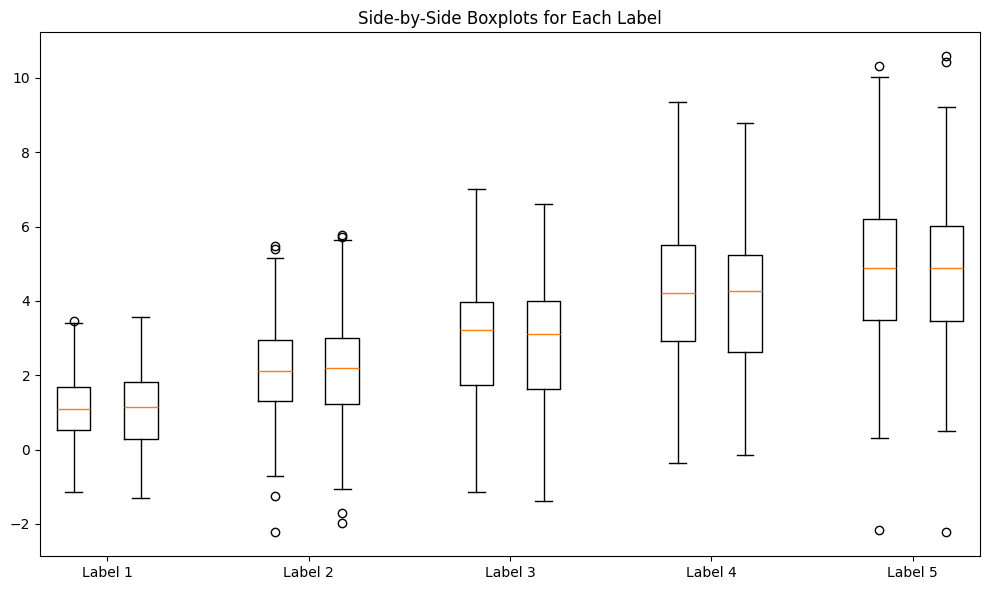

In [12]:
import matplotlib.pyplot as plt
import numpy as np
noisy_data = [d + np.random.normal(loc=0, scale=0.5, size=100) for d in data]

# Generating random data for 5 labels
np.random.seed(10)
data = [np.random.normal(loc=i, scale=np.sqrt(i), size=100) for i in range(1, 6)]

# Adjusting the data to have two boxplots for each label on one plot

# Combine original and noisy data for side-by-side comparison
combined_data = []
for original, noisy in zip(data, noisy_data):
    combined_data.append(original)
    combined_data.append(noisy)

# Position adjustments for side-by-side boxplots
positions = [1, 2, 4, 5, 7, 8, 10, 11, 13, 14]

# Creating a single figure for the combined boxplots
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(combined_data, positions=positions)

# Customizing the x-axis labels to indicate original and noisy data for each label
ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
ax.set_xticklabels(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'])
ax.set_title('Side-by-Side Boxplots for Each Label')

plt.tight_layout()
plt.show()
